# **Ligações para o 911**

Vamos analisar os dados de chamada para o 911(emergência-EUA) do Kaggle. 

* lat: String - Latitude
* lng: String - Longitude
* desc: String - Descrição chamada de emergência
* zip: String - CEP
* título: String - Título
* timeStamp: String - AAAA-MM-DD HH:MM: SS
* twp: String - Township
* addr: String - Endereço
* e: String - Variável Dummy(1)

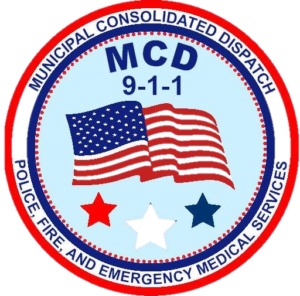

In [ ]:
# Importando bibliotecas para manipular datasets
import pandas as pd
import numpy as np

In [ ]:
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lendo arquivo csv
df = pd.read_csv("/content/911.csv")

In [ ]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531878 entries, 0 to 531877
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        531878 non-null  float64
 1   lng        531878 non-null  float64
 2   desc       531878 non-null  object 
 3   zip        466280 non-null  float64
 4   title      531878 non-null  object 
 5   timeStamp  531877 non-null  object 
 6   twp        531665 non-null  object 
 7   addr       531877 non-null  object 
 8   e          531877 non-null  float64
dtypes: float64(4), object(5)
memory usage: 36.5+ MB


In [ ]:
# Cabeçalho do dataset
df.head(7)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1.0
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1.0


In [ ]:
df.describe()


,lat,lng,zip,e
count,531878.000000,531878.000000,466280.000000,531877.0
mean,40.158469,-75.311343,19235.047004,1.0
std,0.145177,0.948149,301.319363,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.099784,-75.391919,19038.000000,1.0
50%,40.143927,-75.304642,19401.000000,1.0
75%,40.229008,-75.211888,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


Quais são os top 5 CEPs nas chamadas ?

In [ ]:
df['zip'].value_counts().head(5)

19401.0    36006
19464.0    34980
19403.0    27389
19446.0    25746
19406.0    18004
Name: zip, dtype: int64

Tops 5 municípios fazendo chamadas para o 911

In [ ]:
df['twp'].value_counts().head(5)

LOWER MERION    45350
ABINGTON        32105
NORRISTOWN      29678
UPPER MERION    29002
CHELTENHAM      24522
Name: twp, dtype: int64

Quantos códigos de títulos exclusivos existem na coluna title ?

In [ ]:
df['title'].nunique()

145

Na coluna title existem razões/ Departamentos especificados antes do código do título. Estes são EMS/ FIRE/ TRAFFIC vamos usar o .apply() com uma expressão lambda personalizada para criar uma nova coluna chamada razão que contém esse valor de string

Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [ ]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
531873    Traffic
531874        EMS
531875       Fire
531876       Fire
531877         Tr
Name: Reason, Length: 531878, dtype: object

Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna ?

In [ ]:
df['Reason'].value_counts()
# Temos que a maior motivo de chamadas são motivos de saúde.

EMS        262391
Traffic    189715
Fire        79771
Tr              1
Name: Reason, dtype: int64

Agora use o seaborn para criar um countplot de chamadas 911 baseados nesta nova coluna.

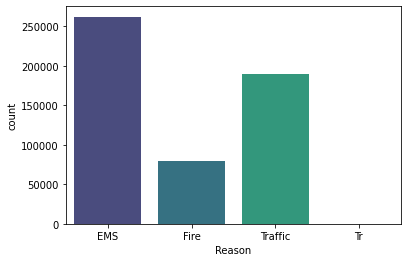

In [ ]:
sns.countplot(x='Reason', data=df, palette='viridis')

Qual é o tipo de dados dos objetos na coluna timestamp?

In [ ]:
type(df['timeStamp'].iloc[1])

str

Vamos converter esse timeStamp para Date Time

In [ ]:
pd.to_datetime(df['timeStamp'])

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
531873   2019-08-08 17:46:25
531874   2019-08-08 17:53:02
531875   2019-08-08 17:51:21
531876   2019-08-08 17:54:40
531877                   NaT
Name: timeStamp, Length: 531878, dtype: datetime64[ns]

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Nós podemos usar o método de consulta de funções(tab) para explorar os vários atributos que podemos chamar. Agora que a coluna timeStamp é realmente obejtos Data Time, use .apply() para criar 3 novas colunas chamadas hour, month e day of week, crie essas colunas se baseando na coluna timestamp

In [ ]:
time = df['timeStamp'].iloc[3]
time

Timestamp('2015-12-10 16:47:36')

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

O dia da semana é um número inteiro de 0 á 6 uso o .map() para mapear os nomes das sequências reais para o dia sa semana

In [ ]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

Agora vamos substituir usando Map, e então nosso DayOfWeek será os dias da semana.

In [ ]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

Agora vamos usar o seaborn para criar um countplot da coluna day of week em função da coluna Reason 

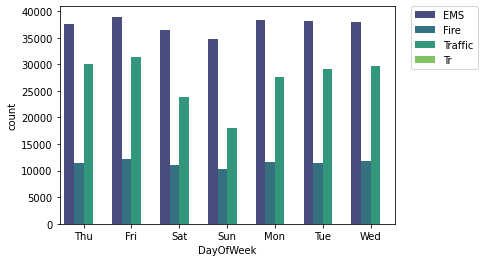

In [ ]:
sns.countplot(x='DayOfWeek', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1 ), loc=2, borderaxespad = 0.)

Vamos fazer o mesmo para o mês

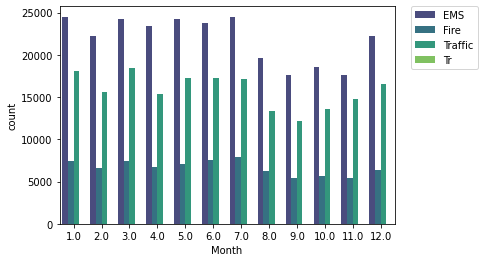

In [ ]:
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1 ), loc=2, borderaxespad = 0.)

Vamos fazer uma tabela para organizar nossas observações por mês

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1.0,50128,50128,50128,44378,50128,50128,50110,50128,50128,50128,50128,50128
2.0,44384,44384,44384,39100,44384,44384,44369,44384,44384,44384,44384,44384
3.0,50107,50107,50107,44344,50107,50107,50087,50107,50107,50107,50107,50107
4.0,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428
5.0,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467
6.0,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493
7.0,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
8.0,39246,39246,39246,34330,39246,39246,39230,39246,39246,39246,39246,39246


Chamadas por mês

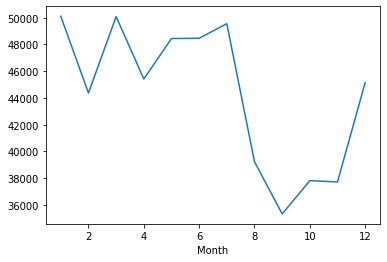

In [ ]:
byMonth['twp'].plot()

Vamos criar um plot linear do nunmero de chamadas por mês. Para isso vamos resetar o index da tabela byMonth, se observarmos byMonth os meses estão no indice e para fazermos este plot precisamos que os meses deixem de ser indices e passem a ser coluna, então vamos usar o reset index para isso e em seguida criar o nosso plot.

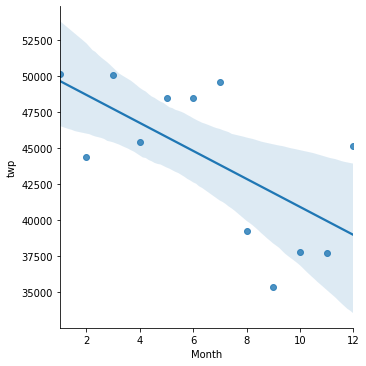

In [ ]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Agora temos nosso modelo linear, a parte sombreada ela indica o erro do modelo linear.

Vamos criar uma nova coluna chamada 'Date' que contenha a data da coluna timeStamp.

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [ ]:
df.Date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
531873    2019-08-08
531874    2019-08-08
531875    2019-08-08
531876    2019-08-08
531877           NaT
Name: Date, Length: 531878, dtype: object

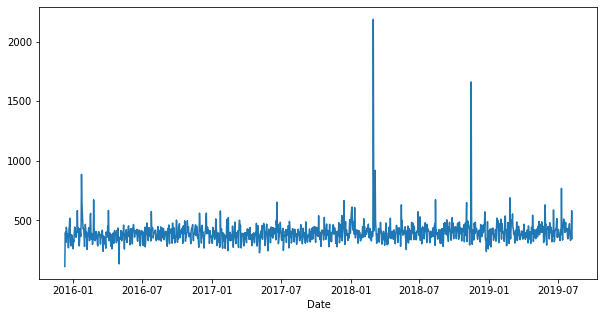

In [ ]:
df.groupby('Date').count()['twp'].plot(figsize=(10,5))

Agora vamos criar plots por Reason

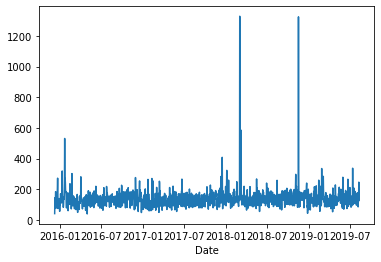

In [ ]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()

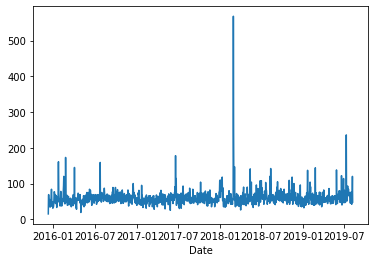

In [ ]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()

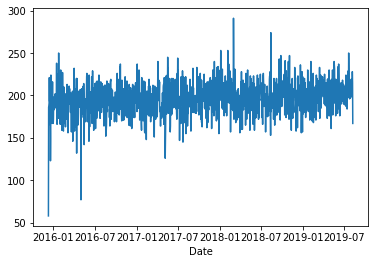

In [ ]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

Vamos criar alguns mapas de calor com o seaborn e para isso devemos reestruturar o quadro de dados para que as colunas se tornem horas e o índice se torne dia da semana. vamos combinar o groupby com o método unstack.

In [ ]:
dayHour = df.groupby(by=['DayOfWeek', 'Hour']).count()['twp'].unstack()
dayHour.head()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
DayOfWeek,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1466,1247,1164,1054,1037,1310,2131,3363,3996,4173,4451,4639,4823,5005,5138,5628,5774,5697,4547,4068,3507,3119,2746,2315
Mon,1532,1237,1100,1015,1082,1427,2166,3585,4541,4692,4319,4507,4700,4491,4497,5009,5148,5138,4382,3557,2993,2595,2130,1645
Sat,1925,1652,1486,1263,1153,1241,1545,2037,2792,3460,3890,4265,4428,4363,4318,4112,4177,4169,3986,3812,3315,3105,2604,2372
Sun,1914,1697,1541,1297,1205,1159,1392,1937,2426,3012,3449,3504,3873,3677,3779,3587,3634,3597,3480,3351,2982,2564,2073,1866
Thu,1376,1105,1117,966,1009,1417,2303,3602,4294,4380,4402,4395,4730,4904,4834,5173,5103,5625,4471,3722,3234,2829,2227,1834


Vamos analisar chamadas por hora e dia da semana

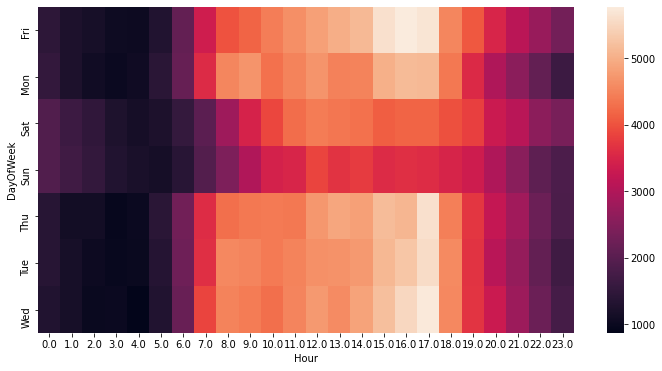

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

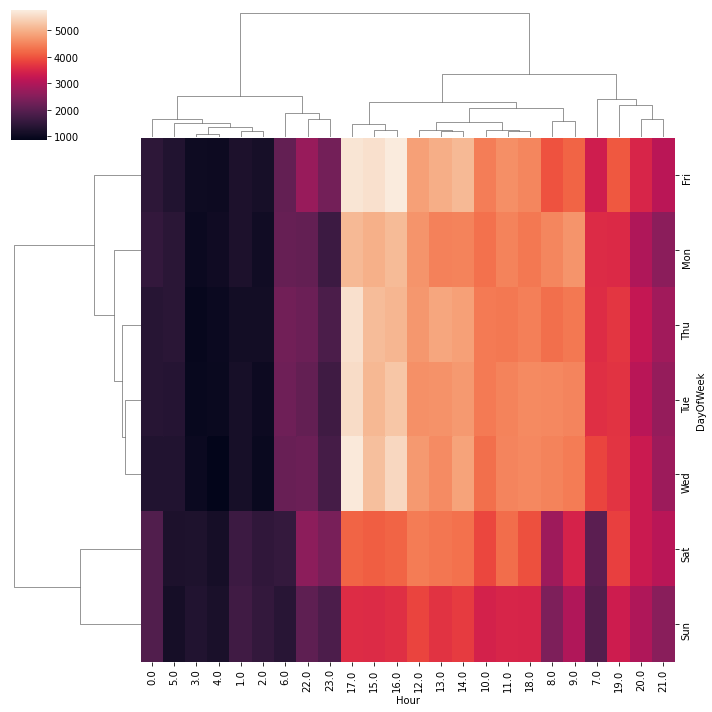

In [ ]:
sns.clustermap(dayHour)

Acima analisamos o gráfico por dia da semana e horário, percebemos que o maior número de chamadas são feitos no perído da tarde.

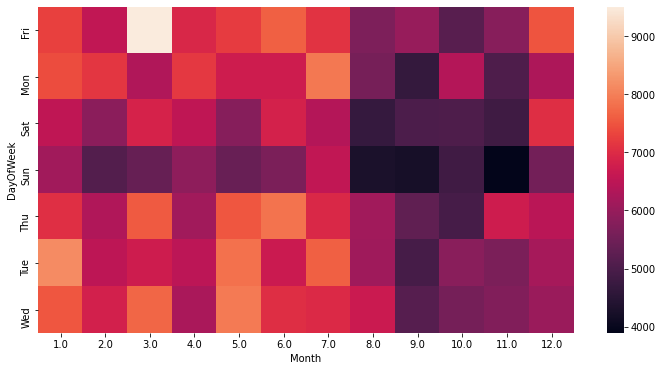

In [ ]:
dayHour = df.groupby(by=['DayOfWeek', 'Month']).count()['twp'].unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

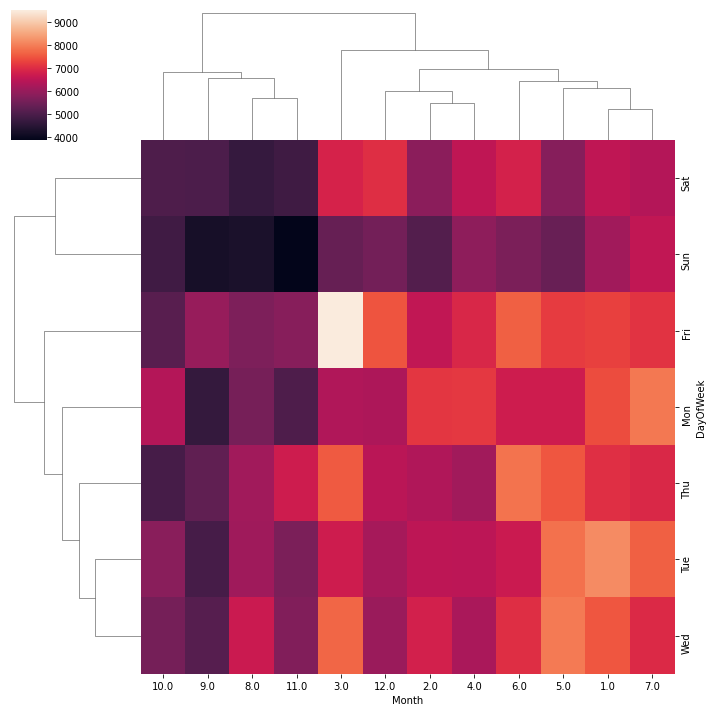

In [ ]:
sns.clustermap(dayHour)